In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import seaborn as sns


📌 Random Forest
Accuracy: 0.84375
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       640
           1       0.82      0.89      0.85       640

    accuracy                           0.84      1280
   macro avg       0.85      0.84      0.84      1280
weighted avg       0.85      0.84      0.84      1280



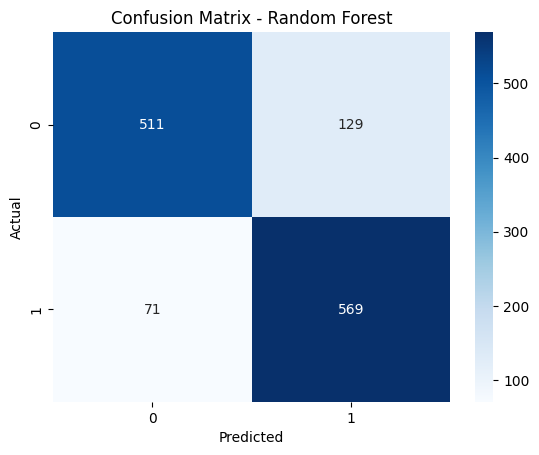


📌 Logistic Regression
Accuracy: 0.72421875
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       640
           1       0.69      0.83      0.75       640

    accuracy                           0.72      1280
   macro avg       0.73      0.72      0.72      1280
weighted avg       0.73      0.72      0.72      1280



c:\Users\Pham Duc Nhan\workspace\NVC-CSA02-HB\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


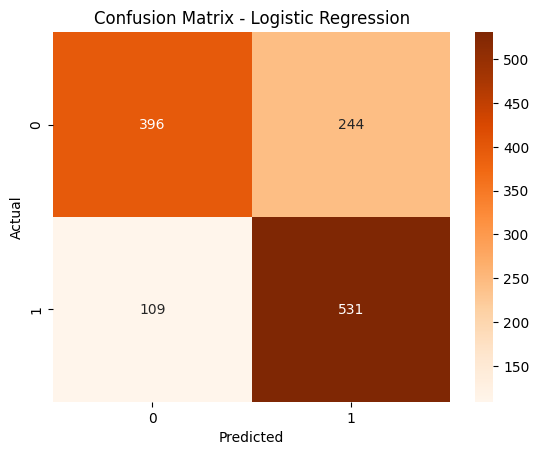

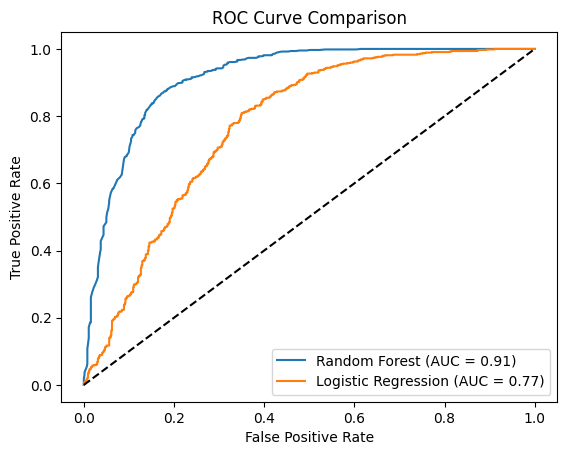

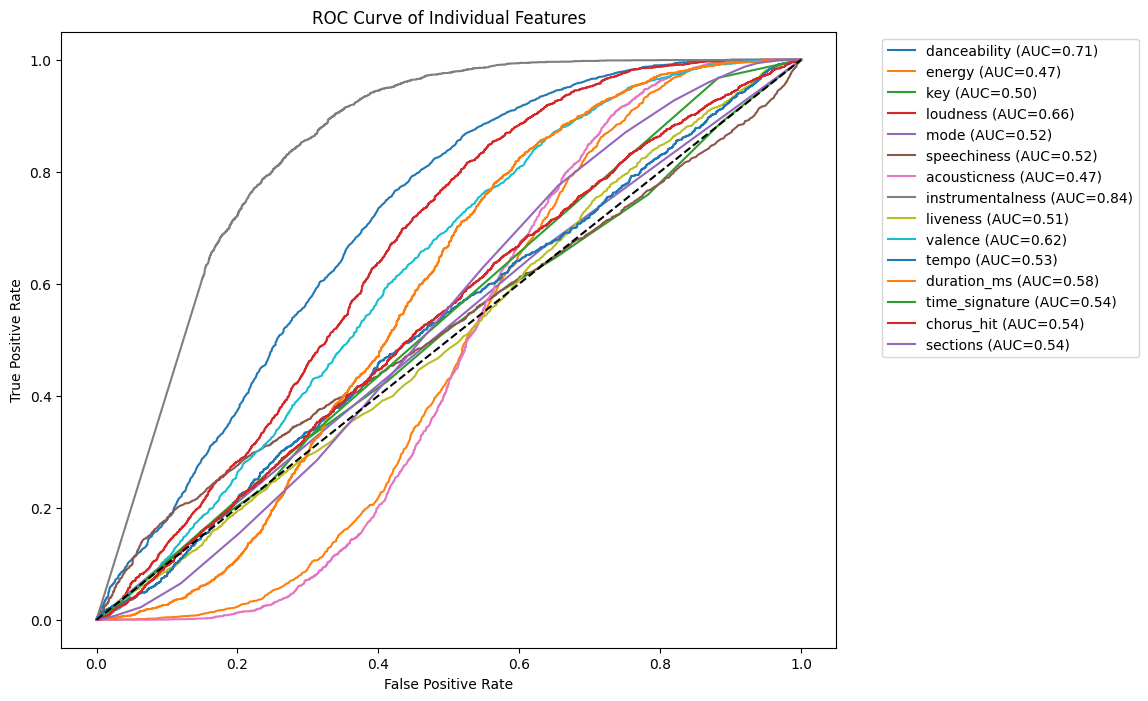

c:\Users\Pham Duc Nhan\workspace\NVC-CSA02-HB\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Coefficients:
danceability: 1.007694508428483
energy: -0.6566236007629556
key: -0.00361720162983654
loudness: 0.30333566002342616
mode: 0.18634561019514254
speechiness: 0.07635332147236377
acousticness: 0.05749760517674567
instrumentalness: -1.566277318374005
liveness: -0.23010574607748924
valence: 0.23283581360878536
tempo: -0.003592597237775508
duration_ms: -1.322866521619878e-06
time_signature: 1.061154110124651
chorus_hit: -0.01590152817590849
sections: -0.10364809160577759

Random Forest Feature Importances:
danceability: 0.09581568761975522
energy: 0.093506438692699
key: 0.023170147813376726
loudness: 0.10166116643326753
mode: 0.006261145974992865
speechiness: 0.04878310463765608
acousticness: 0.09568665160981006
instrumentalness: 0.23780065210665038
liveness: 0.039448481017026
valence: 0.07160430529013237
tempo: 0.04117492740182538
duration_ms: 0.06960177851332253
time_signature: 0.007998331819409715
chorus_hit: 0.03965662301602932
sections: 0.02783055805404

In [ ]:
# 1. Load dataset
df = pd.read_csv("dataset-of-10s.csv")

# 2. Xóa cột không cần thiết
X = df.drop(columns=["track", "artist", "uri", "target"])
y = df["target"]

# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------- Random Forest ----------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📌 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix RF

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC RF
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)


# ---------------- Logistic Regression ----------------
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n📌 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Confusion Matrix LR
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC LR
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)


# ---------------- ROC Comparison ----------------
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()

features = [
    "danceability","energy","key","loudness","mode","speechiness",
    "acousticness","instrumentalness","liveness","valence","tempo",
    "duration_ms","time_signature","chorus_hit","sections"
]

plt.figure(figsize=(10,8))

for feature in features:
    X_feat = X[[feature]]  # chỉ lấy 1 feature
    model_feat = LogisticRegression(max_iter=1000)
    model_feat.fit(X_feat, y)
    y_prob = model_feat.predict_proba(X_feat)[:,1]
    
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{feature} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of Individual Features")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

modelL = LogisticRegression(max_iter=1000)
modelL.fit(X_train, y_train)

modelR = RandomForestClassifier(random_state=42)
modelR.fit(X_train, y_train)

# Logistic Regression: lấy coefficients
print("\nLogistic Regression Coefficients:")
for feature, coef in zip(X.columns, modelL.coef_[0]):
    print(f"{feature}: {coef}")

# Random Forest: lấy feature importances
print("\nRandom Forest Feature Importances:")
for feature, importance in zip(X.columns, modelR.feature_importances_):
    print(f"{feature}: {importance}")

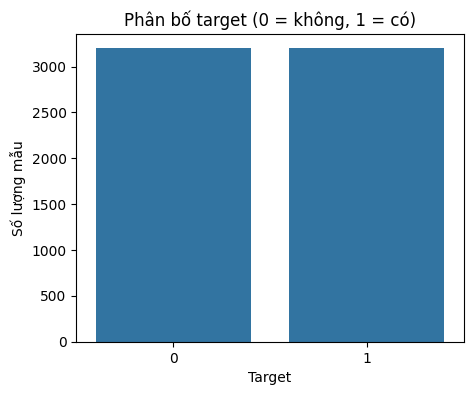

target
1    3199
0    3199
Name: count, dtype: int64


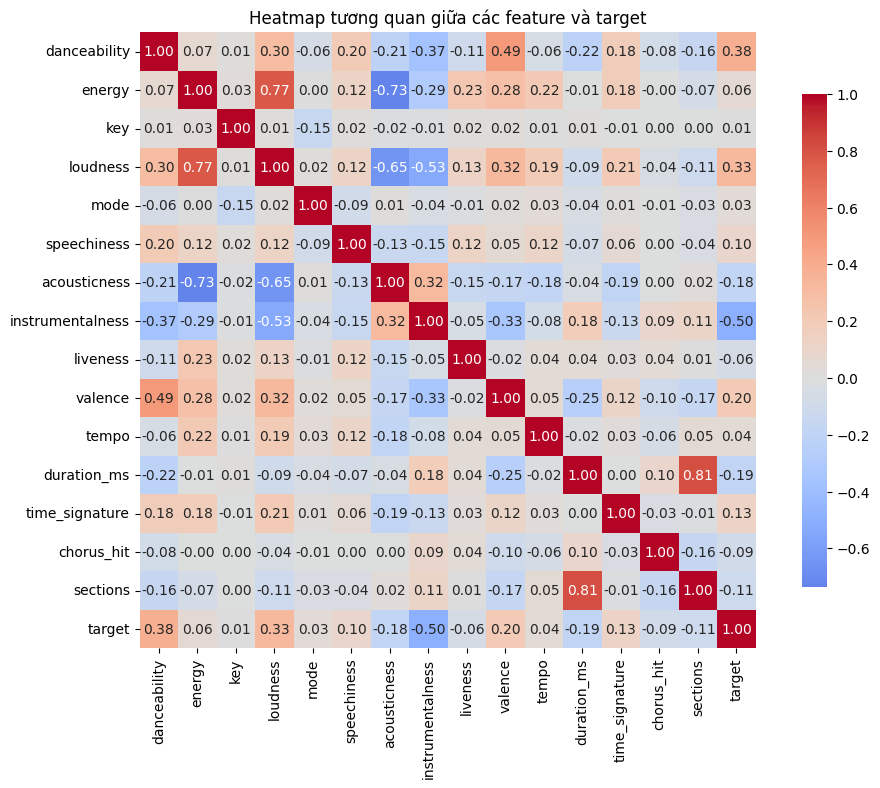

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


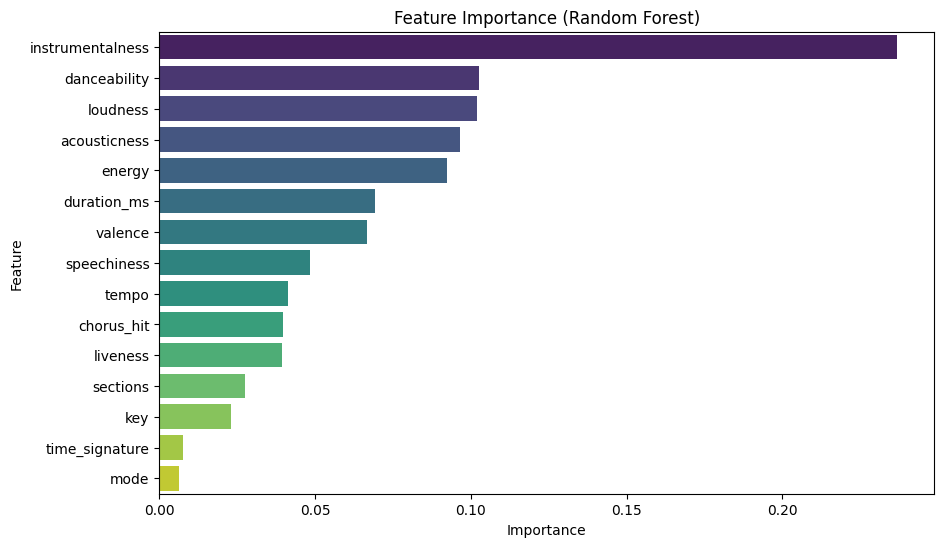

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


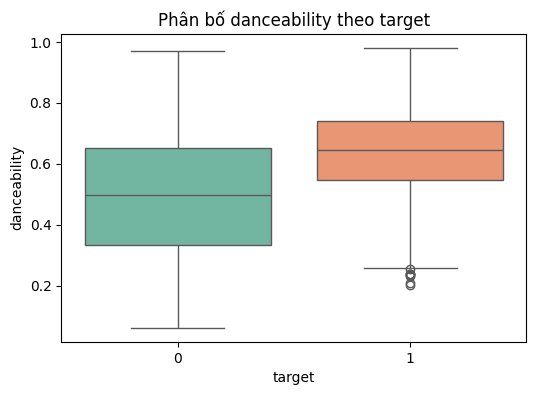

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


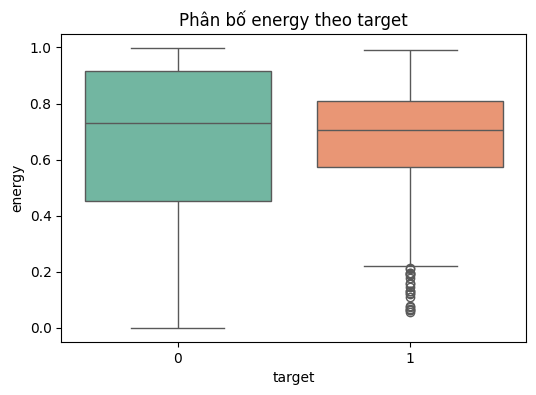

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


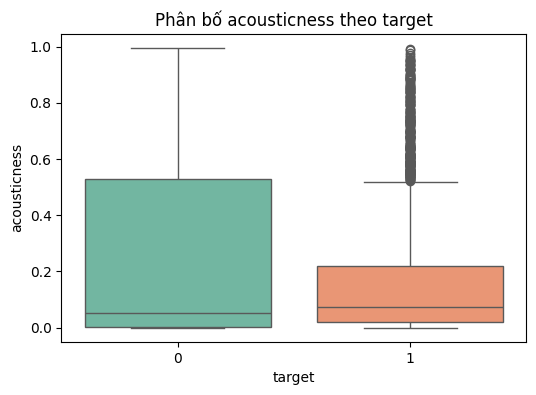

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


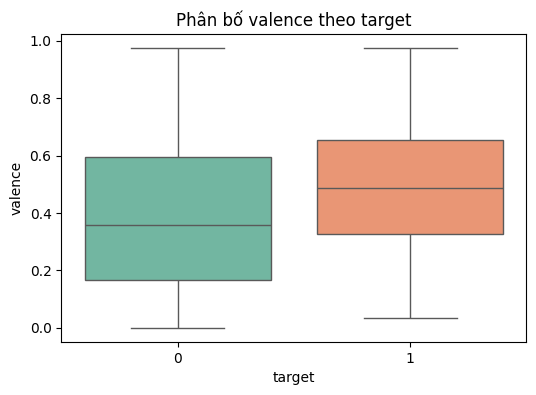

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


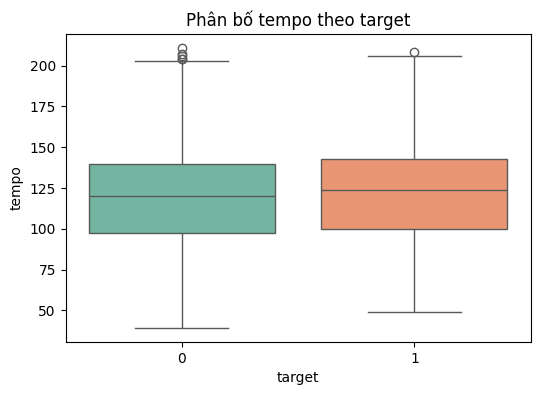

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[col], palette="Set2")


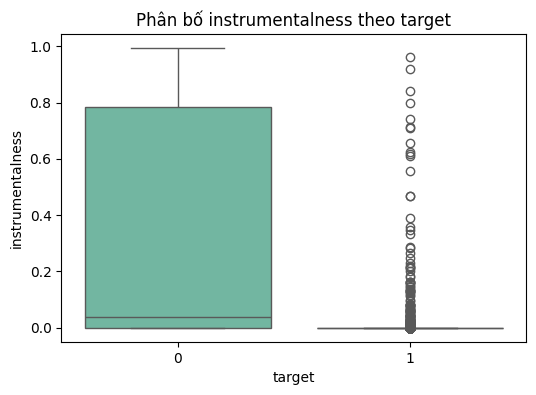

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


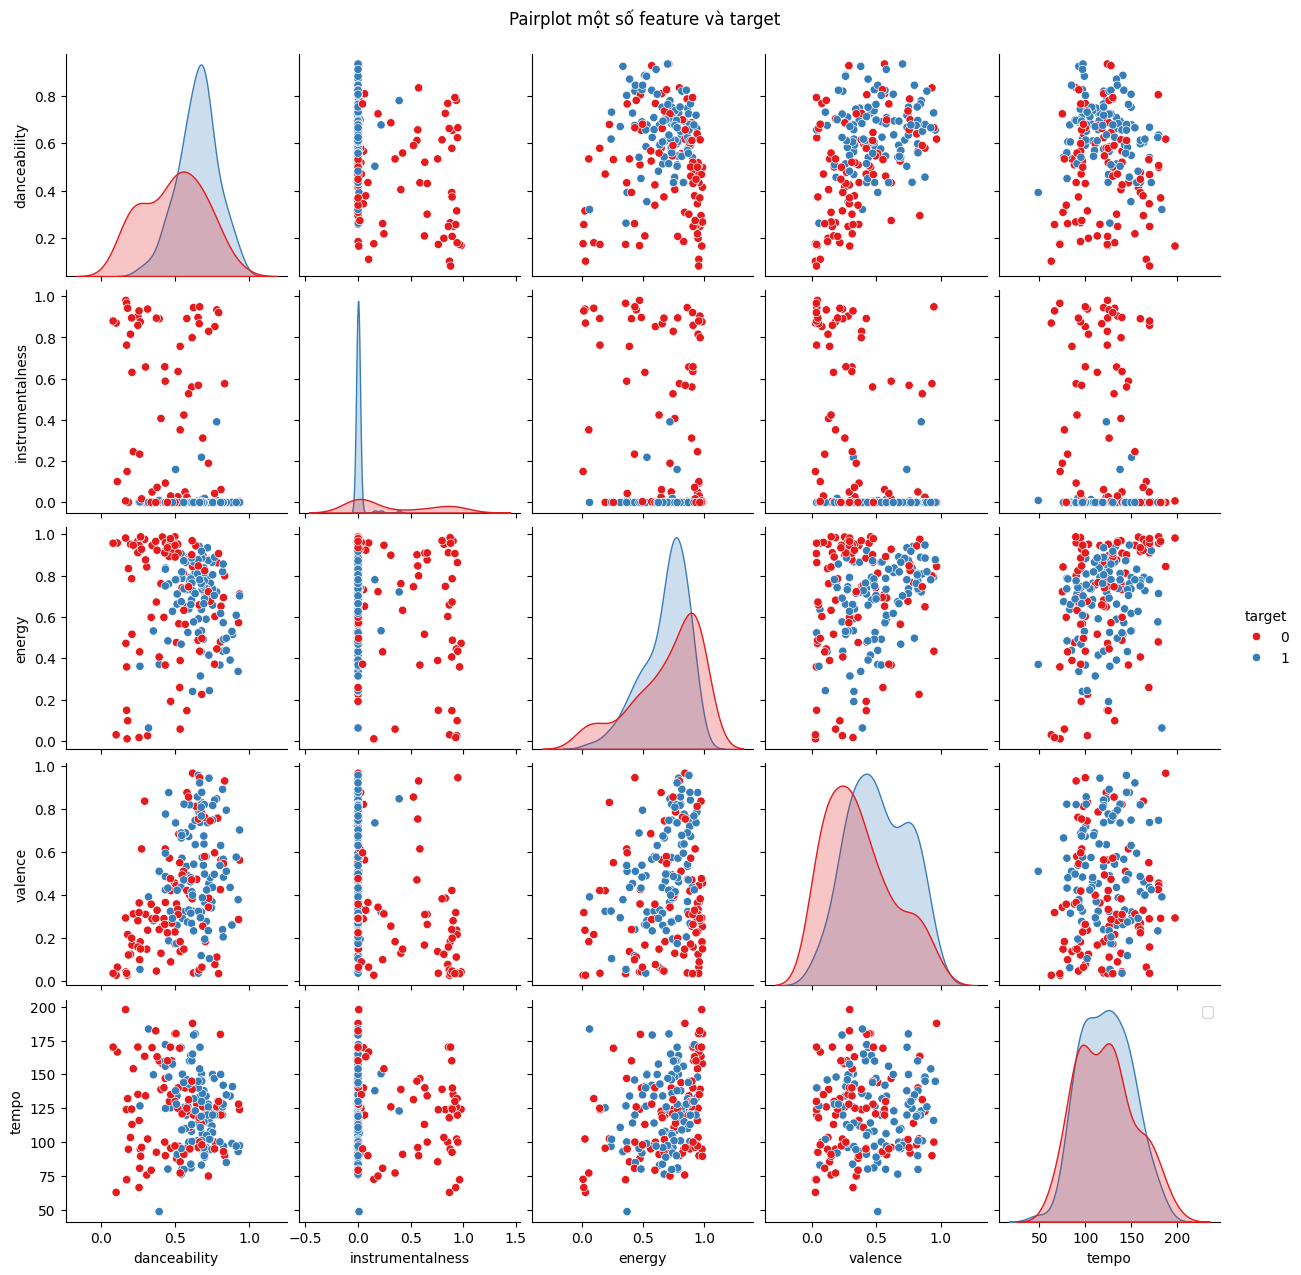

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\1669528049.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


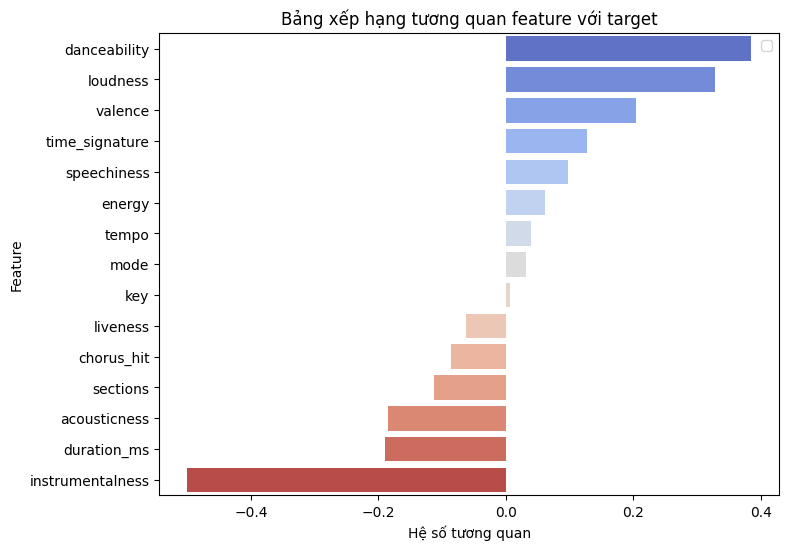

In [10]:
# Giữ lại feature số + target
X = df.drop(columns=["track", "artist", "uri", "target"])
y = df["target"]

# 2. Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# =======================================
# 📊 Visualization
# =======================================

# A. Phân bố target
plt.figure(figsize=(5,4))
sns.countplot(x=y)
plt.title("Phân bố target (0 = không, 1 = có)")
plt.xlabel("Target")
plt.ylabel("Số lượng mẫu")
plt.show()

# In số lượng chi tiết
print(y.value_counts())

# B. Heatmap tương quan giữa feature và target
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title("Heatmap tương quan giữa các feature và target")
plt.show()

# C. Feature Importance từ Random Forest
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

# D. Phân bố từng feature theo target (boxplot/histogram)
for col in ["danceability", "energy", "acousticness", "valence", "tempo", "instrumentalness"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=df[col], palette="Set2")
    plt.title(f"Phân bố {col} theo target")
    plt.show()

# E. Pairplot để xem quan hệ nhiều chiều (sample nhỏ để không nặng)
sample_df = df.sample(200, random_state=42) if len(df) > 200 else df
sns.pairplot(sample_df[["danceability","instrumentalness","energy","valence","tempo","target"]],
             hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot một số feature và target", y=1.02)
plt.legend()
plt.show()

#F. Bản xếp hạng độ tương quan với target

# Giả sử target tên là "target"
corr = df.corr(numeric_only=True)["target"].drop("target").sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Bảng xếp hạng tương quan feature với target")
plt.xlabel("Hệ số tương quan")
plt.ylabel("Feature")
plt.legend()
plt.show()

C:\Users\Pham Duc Nhan\AppData\Local\Temp\ipykernel_17404\2615466291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


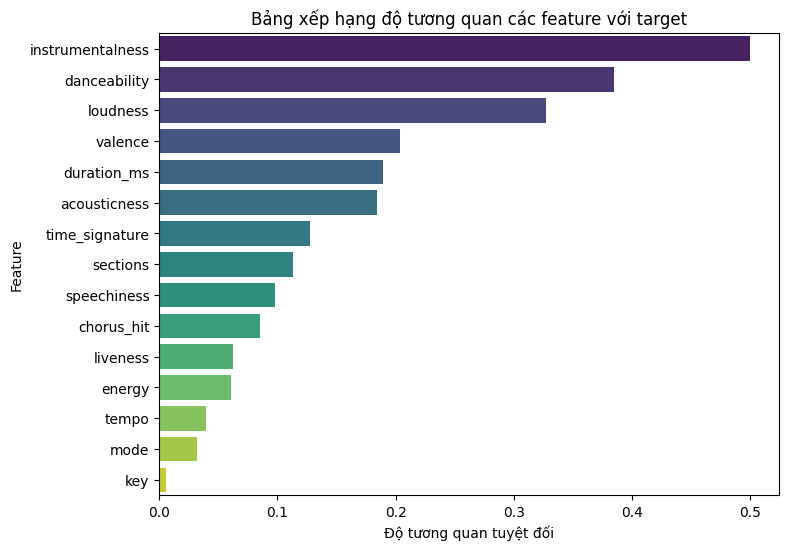

In [4]:
corr = df.corr(numeric_only=True)["target"].drop("target").abs().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Bảng xếp hạng độ tương quan các feature với target")
plt.xlabel("Độ tương quan tuyệt đối")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Chọn 5 features chính
top5_features = ["instrumentalness", "danceability", "loudness", "valence", "duration_ms"]

X_top5 = X[top5_features]

# Chia lại train/test chỉ với 5 features
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(
    X_top5, y, test_size=0.2, random_state=42
)

# Train Random Forest với 5 features
rf_top5 = RandomForestClassifier(random_state=42)
rf_top5.fit(X_train_top5, y_train_top5)
y_pred_rf_top5 = rf_top5.predict(X_test_top5)
acc_rf_top5 = accuracy_score(y_test_top5, y_pred_rf_top5)

# Train Logistic Regression với 5 features
lr_top5 = LogisticRegression(max_iter=1000, random_state=42)
lr_top5.fit(X_train_top5, y_train_top5)
y_pred_lr_top5 = lr_top5.predict(X_test_top5)
acc_lr_top5 = accuracy_score(y_test_top5, y_pred_lr_top5)

print("🎯 Accuracy với 5 features chính:")
print(f"Random Forest: {acc_rf_top5:.4f}")
print(f"Logistic Regression: {acc_lr_top5:.4f}")


🎯 Accuracy với 5 features chính:
Random Forest: 0.7547
Logistic Regression: 0.7688
